In [1]:
import tensorflow as tf

/Users/olaf/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# MNIST database
* Modified National Institute of Standards and Technology
* https://en.wikipedia.org/wiki/MNIST_database
* http://yann.lecun.com/exdb/mnist/

## 손글씨 분류 by MLP
* 본 예제는 3분 딥러닝 예제 코드를 참고하여 만들었습니다.  
(https://github.com/golbin/TensorFlow-Tutorials/blob/master/06%20-%20MNIST/01%20-%20MNIST.py)

In [2]:
# MNIST 데이터
from tensorflow.examples.tutorials.mnist import input_data

# https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples
# https://github.com/tensorflow/tensorflow/tree/master/tensorflow/contrib/learn/python/learn/datasets
# 여기만 잘 봐도 실습 코드와 연습용 데이터(mnist, dbpedia 등) 가득

mnist = input_data.read_data_sets("./data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## NN 모델 만들기
* Input Layer     : 784 Neurons
* Hidden Layer #1 : 256 Neurons (W: 정규분포 평균 0 & 표준편차 0.01, B: 0, Activation: ReLU)
* Hidden Layer #2 : 256 Neurons (W: 정규분포 평균 0 & 표준편차 0.01, B: 0, Activation: ReLU)
* Output Layer    : 10 Neurons  (W: 정규분포 평균 0 & 표준편차 0.01, B: 0, Activation: Softmax)

In [2]:
# >>>>>>>>>> LAYERS (Weight, Bias, Activation)

# INPUT LAYER: 손글씨 이미지는 28*28 = 784개의 feature 
# 이미지 1장 (1, 784): array([[0., 0., 0.8078432, ... 0.14901961, 0.]])
# 결과  1장 (1, 10): array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

# https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/placeholder
X = tf.placeholder(tf.float32, [None, 784])

# 결과 값: 0~9 10가지 분류로 만듬
Y = tf.placeholder(tf.float32, [None, 10])

# https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/Variable
# https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/random_normal
# https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/nn/relu
W1 = tf.Variable(tf.random_normal([784, 256], mean=0.0, stddev=0.01))
B1 = tf.Variable(tf.zeros([256]))
H1 = tf.nn.relu(tf.add(tf.matmul(X, W1), B1))

W2 = tf.Variable(tf.random_normal([256, 256], mean=0.0, stddev=0.01))
B2 = tf.Variable(tf.zeros([256]))
H2 = tf.nn.relu(tf.add(tf.matmul(H1, W2), B2))

W3 = tf.Variable(tf.random_normal([256, 10], mean=0.0, stddev=0.01))
B3 = tf.Variable(tf.zeros([10]))
output  = tf.add(tf.matmul(H2, W3), B3)
# https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/nn/softmax
prediction = tf.nn.softmax(output) # 학습할 때도 Softmax를 수행하지 않게 하려면?

NameError: name 'tf' is not defined

In [4]:
# >>>>>>>>>> ERROR(COST, LOSS) FUNCTION: Cross Entropy, MSE, ...

# https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/reduce_sum
# https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/reduce_mean
# https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/log
# https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/nn/softmax_cross_entropy_with_logits_v2
error = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(prediction), axis=1))

In [5]:
# >>>>>>>>>> OPTIMIZER (by Backpropagation & Gradient Descent & ...)

learning_rate = 0.01
# https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/train/GradientDescentOptimizer
# https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/train/MomentumOptimizer  
# https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/train/RMSPropOptimizer
# https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/train/AdamOptimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

## NN 학습 (by mini-batch)

In [14]:
mini_batch_size = 100 # 미니 배치의 크기 (이미지 수)
batch_count = int(mnist.train.num_examples / mini_batch_size) # 배치 횟수 (몇 번의 배치를 돌아야 1 Epoch이 완성 되는가)
epoch_count = 10 # Epoch 횟수
validation_count = 5000

init = tf.global_variables_initializer()
with tf.Session() as sess: 
    sess.run(init)
    
    for epoch in range(epoch_count):
        # Epoch 구간
        total_error = 0
        
        for i in range(batch_count):
            # 미니 배치 구간
            # mnist.train.next_batch: 전체 training set을 shuffle한 다음 mini_batch_size 만큼 반환
            train_x, train_y = mnist.train.next_batch(mini_batch_size)
            
            _, error_value = sess.run([optimizer, error], feed_dict={X: train_x, Y: train_y})
            
            total_error += error_value
        
        # Accuracy 구하기
        valid_x, valid_y = mnist.validation.next_batch(validation_count)

        is_correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

        valid_error_value, valid_accuracy_value, valid_pred = sess.run(
            [error, accuracy, prediction], feed_dict={X: valid_x, Y: valid_y})

        print('Epoch:', '%04d' % (epoch + 1))
        print('Avg. Error = {:.3f}, Valid. Error: {:.3f}, Accuracy: {:.3f}'.format(
            total_error / batch_count,
            valid_error_value, 
            valid_accuracy_value))


Epoch: 0001
Avg. Error = 0.004, Valid. Error: 2.301, Accuracy: 0.113
Epoch: 0002
Avg. Error = 0.004, Valid. Error: 2.297, Accuracy: 0.113
Epoch: 0003
Avg. Error = 0.004, Valid. Error: 2.281, Accuracy: 0.281
Epoch: 0004
Avg. Error = 0.004, Valid. Error: 2.177, Accuracy: 0.290
Epoch: 0005
Avg. Error = 0.003, Valid. Error: 1.710, Accuracy: 0.473
Epoch: 0006
Avg. Error = 0.003, Valid. Error: 1.415, Accuracy: 0.528
Epoch: 0007
Avg. Error = 0.003, Valid. Error: 1.286, Accuracy: 0.551
Epoch: 0008
Avg. Error = 0.002, Valid. Error: 1.153, Accuracy: 0.611
Epoch: 0009
Avg. Error = 0.002, Valid. Error: 1.088, Accuracy: 0.629
Epoch: 0010
Avg. Error = 0.002, Valid. Error: 1.049, Accuracy: 0.634


## 그림 확인 하기

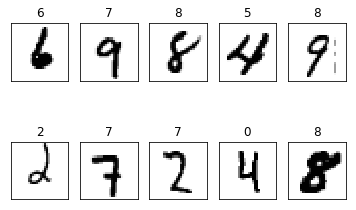

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(valid_pred[i]))
    subplot.imshow(mnist.validation.images[i].reshape((28, 28)),
                   cmap=plt.cm.gray_r)

plt.show()